# COVID19 PredictoR

### In this project given by The Tech cubes I will be using Ploynomial regression to Predict the covid19 total cases for a week

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Importing the Dataset

In [2]:
df=pd.read_csv("csv.csv")
df = df[["Date","Confirmed"]]

df.tail(10)

,Date,Confirmed
1991,16/05/2020,672
1992,16/05/2020,13
1993,16/05/2020,1935
1994,16/05/2020,4727
1995,16/05/2020,10108
1996,16/05/2020,1454
1997,16/05/2020,156
1998,16/05/2020,82
1999,16/05/2020,4057
2000,16/05/2020,2461


Dataset contain duplicates,also the per day data has to be aggregated from the given dataset,so let us do the preprocessing

In [3]:
def preprocess(dataset):
    new_dataset = dataset.copy()
    new_dataset.drop_duplicates(subset="Date", keep="first", inplace=True)
    for i in range(0,len(new_dataset)):
        new_dataset.iloc[i,1] = int(dataset.loc[dataset["Date"] == new_dataset.iloc[i,0] , ["Confirmed"]].sum(axis = 0, skipna = True))
    new_dataset["Date"] = pd.to_datetime(new_dataset["Date"], dayfirst=True)
    return new_dataset

In [4]:
df1=preprocess(df)
df1.reset_index(drop = True)

df1.tail()

,Date,Confirmed
1836,2020-05-12,70756
1869,2020-05-13,74281
1902,2020-05-14,78003
1935,2020-05-15,81970
1968,2020-05-16,85710


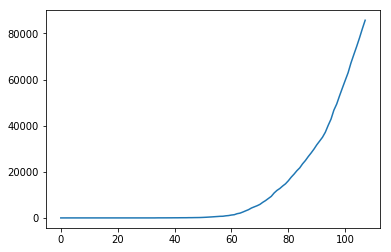

In [5]:
x=pd.DataFrame([i for i in range(len(df1))])

y=df1.iloc[:,-1].values

plt.plot(x,y)


In [6]:
pr=PolynomialFeatures(degree=4)
x_poly=pr.fit_transform(x)

In [7]:
lr2=LinearRegression()
lr2.fit(x_poly,y)
print(lr2.predict(pr.fit_transform([[6.5]])))
print(lr2.score(x_poly, y))

[-71.65139448]
0.9995249181068719


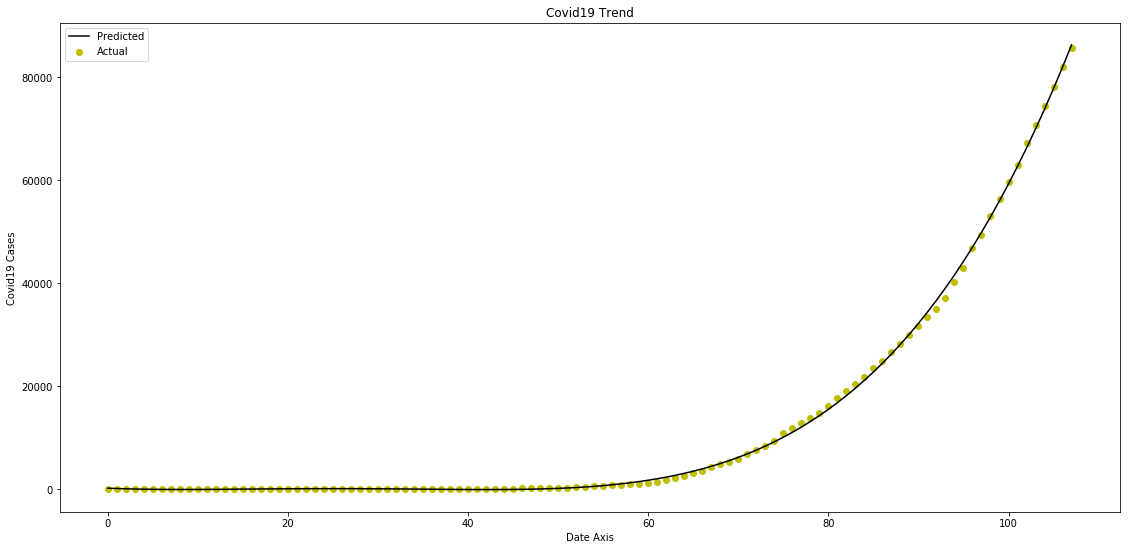

In [8]:
plt.figure(figsize=(19,9))
plt.scatter(x,y,label="Actual",color='y')
plt.plot(lr2.predict(x_poly),color='k',label="Predicted")
plt.title("Covid19 Trend")
plt.xlabel("Date Axis")
plt.ylabel("Covid19 Cases")
plt.legend()
plt.show()

### Weekly Forecasting 

In [9]:

s=0
print("Actual")
print("")
for i in range((len(df1)-9),len(df1)):
    if s==0:
        print(f"{s+30} April --> ",df1.iloc[i:i+1,1].values)
    else:    
        print(f"{s} May --> ",df1.iloc[i:i+1,1].values)
    s+=1
s=0
print("")
print("Predicted")
print("")
for i in range((len(df1)-9),len(df1)):
    
    if s==0:
        print(f"{s+30} April --> ",int(lr2.predict(pr.fit_transform([[i]]))))
    else:
        print(f"{s} May --> ",int(lr2.predict(pr.fit_transform([[i]]))))
    s+=1

s=17
print("")
print("Forecasted for Week")
print("")
for i in range((len(df1)),len(df1)+7):
    print(f"{s} May --> ",int(lr2.predict(pr.fit_transform([[i]]))))
    s+=1

Actual

30 April -->  [56342]
1 May -->  [59662]
2 May -->  [62939]
3 May -->  [67152]
4 May -->  [70756]
5 May -->  [74281]
6 May -->  [78003]
7 May -->  [81970]
8 May -->  [85710]

Predicted

30 April -->  55974
1 May -->  59245
2 May -->  62656
3 May -->  66208
4 May -->  69907
5 May -->  73756
6 May -->  77760
7 May -->  81921
8 May -->  86244

Forecasted for Week

17 May -->  90734
18 May -->  95394
19 May -->  100228
20 May -->  105241
21 May -->  110437
22 May -->  115821
23 May -->  121397


In [10]:
from sklearn.externals import joblib

In [11]:
joblib.dump(lr2,'prone.sky')

['prone.sky']

In [12]:
load=joblib.load('prone.sky')

In [13]:
load.predict(pr.fit_transform([[112]]))

array([110437.91620283])